# 2: Data Analysis

**2.1 :Reading data**

In [344]:
import pandas as pd
# Read CSV file
data = pd.read_csv("train_data.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       2000 non-null   int64 
 1   Age      2000 non-null   int64 
 2   MF       2000 non-null   object
 3   LoE      1990 non-null   object
 4   YoW      2000 non-null   int64 
 5   YoCW     2000 non-null   int64 
 6   Income   2000 non-null   int64 
 7   Housing  1990 non-null   object
 8   Car      1990 non-null   object
 9   Res      2000 non-null   object
dtypes: int64(5), object(5)
memory usage: 156.4+ KB


**2.2: PreProcess**

In [345]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the IQR and remove outliers for numeric columns
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))]

# Handle NaN values
data = data.dropna()


In [346]:
# Define the mapping of string values to numerical values
education_mapping = {
    'Dip': 1,
    'Ad. Dip': 2,
    'Bach': 3,
    'Mst': 4,
    'Doct': 5,
    'P. Doct': 6
}
housing_mapping = {
    'R': 0.5,
    'N': 0,
    'O': 1
}
Res_mapping = {
    'Accept':1,
    'Reject':0
}
Sex_mapping = {
    'M':1,
    'F':0
}
data['LoE'] = data['LoE'].map(education_mapping)
data['Housing'] = data['Housing'].map(housing_mapping)
data['Res'] = data['Res'].map(Res_mapping)
data['MF'] = data['MF'].map(Sex_mapping)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Car'] = le.fit_transform(data['Car'])


In [347]:
# Normalize the data using min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=data.columns)

In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       1955 non-null   float64
 1   Age      1955 non-null   float64
 2   MF       1955 non-null   float64
 3   LoE      1955 non-null   float64
 4   YoW      1955 non-null   float64
 5   YoCW     1955 non-null   float64
 6   Income   1955 non-null   float64
 7   Housing  1955 non-null   float64
 8   Car      1955 non-null   float64
 9   Res      1955 non-null   float64
dtypes: float64(10)
memory usage: 152.9 KB


**2.3: Display data**
10 Points? really?

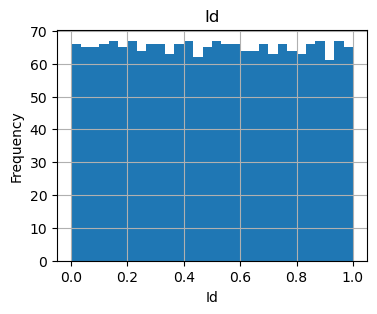

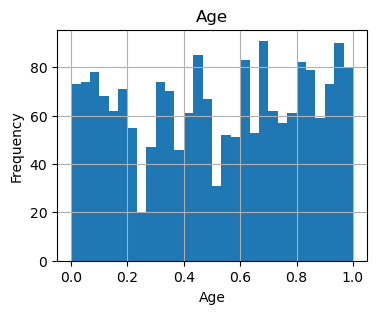

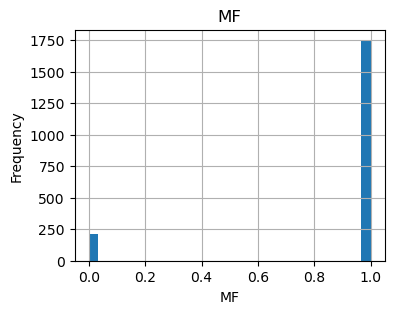

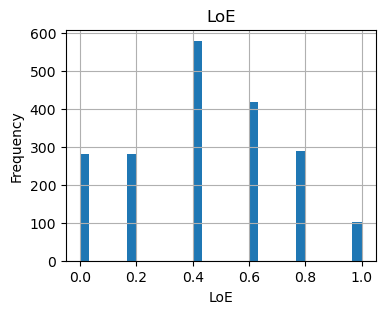

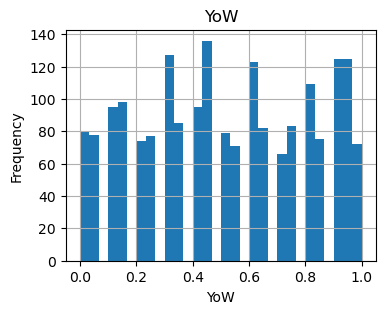

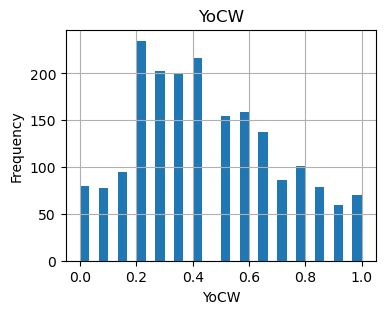

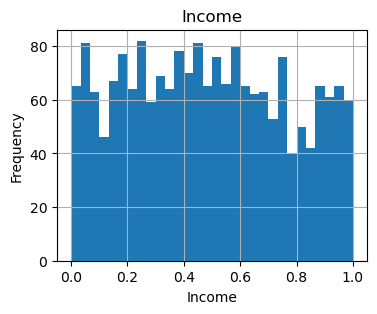

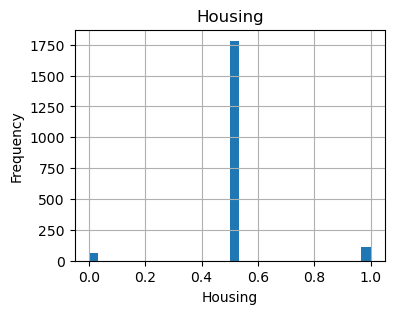

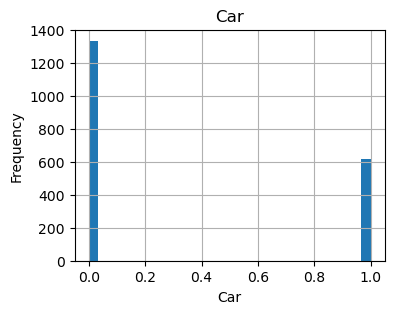

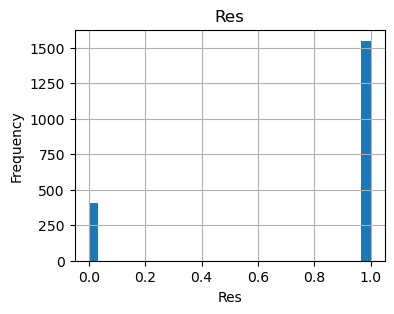

In [349]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot histograms for each numeric column
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(4, 3))
    data[col].hist(bins=30)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

- ID

    Since it's unique for each applicant which means similar heights, suggests a uniform distribution of ‘Id’ values within the range from 0.0 to 1.0.
- Age

    Not any particular shape.little bit rise at both ends of interval:old & young applicants are more than middle ageies.
- MF

    Seems like most of the applicants are male rather than feamle.
- LoE 

    The histogram suggests that the majority of applicants have medium levels of education (Batch), with fewer applicants having higher levels of education (P.Doc).
- YoW: ave=10.3     max=20      min=0

    The bars are almost evenly distributed along the YoW axis, suggesting a uniform distribution of applicants across the range of Year of Work values.
    There is a clear peak around the average proving the average consistency.
- YoCW: ave=6.7     max=14      min=0

    The distribution of bars suggests a somewhat normal distribution with a slight skew to the left, as there are more bars on the left side of the peak than on the right meaning most of the applicants are not freshmen at their most recent job.
- Income: ave=5169462.18    max = 9961539   min=53886

    No specific bias.all categories seems alike(slightly gaussian).
- Housing

    Most of the applicants are residents.
- Car

    Most of them don't have car.

The proper model validation criterion would depend on the specific characteristics of the data. Since the histogram indicates a bimodal distribution, using validation metrics that are suitable for handling imbalanced or bimodal data distributions is the most considerable plan. Some appropriate model validation criteria for this type of data distribution could include precision, recall, F1 score, ROC-AUC, or PR-AUC.

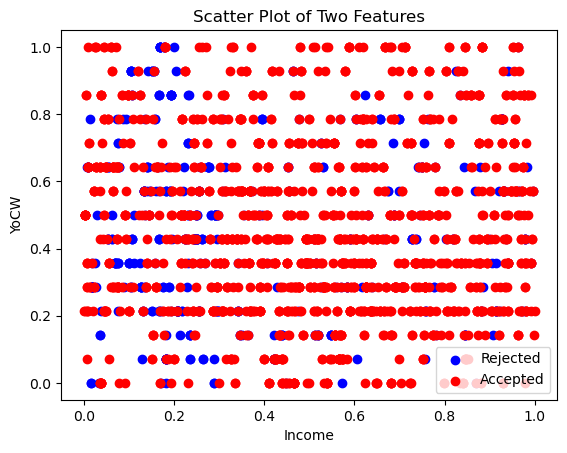

In [350]:
# Select two random features and the label column
selected_features = data[['Income', 'YoCW', 'Res']]

# Plot the selected features
plt.scatter(selected_features[selected_features['Res'] == 0]['Income'], selected_features[selected_features['Res'] == 0]['YoCW'], color='blue', label='Rejected')
plt.scatter(selected_features[selected_features['Res'] == 1]['Income'], selected_features[selected_features['Res'] == 1]['YoCW'], color='red', label='Accepted')

plt.xlabel('Income')
plt.ylabel('YoCW')
plt.title('Scatter Plot of Two Features')
plt.legend()
plt.show()


In [351]:
import numpy as np
# Repeat the process 5 times
for _ in range(5):
    # Select two random features
    feature1, feature2 = np.random.choice(data.columns.drop('Res'), size=2, replace=False)
    # Calculate the correlation coefficient between the selected features
    correlation_coefficient = data[feature1].corr(data[feature2])
    
    print(f"Correlation coefficient between {feature1} and {feature2}: {correlation_coefficient}")


Correlation coefficient between Age and MF: 0.014376368880224052
Correlation coefficient between Income and LoE: -0.0016352138500932987
Correlation coefficient between YoW and MF: 0.03605905125713272
Correlation coefficient between LoE and Car: -0.06194884397395536
Correlation coefficient between Income and Car: -0.004972944409514855


**2.4:Data Analysis**

In [352]:
from scipy import stats

# Subset the data to include 'LoE' and 'Res' columns
education_admission_data = data[['LoE', 'Res']]

# Group the data by 'LoE' and calculate admission rates
admission_rates = education_admission_data.groupby('LoE')['Res'].mean()

# Perform t-test to compare admission rates between different levels of education
education_levels = education_admission_data['LoE'].unique()
statement_accuracy = {}

for i in range(len(education_levels)):
    for j in range(i+1, len(education_levels)):
        level1 = education_levels[i]
        level2 = education_levels[j]
        
        group1 = education_admission_data[education_admission_data['LoE'] == level1]['Res']
        group2 = education_admission_data[education_admission_data['LoE'] == level2]['Res']
        
        t_stat, p_val = stats.ttest_ind(group1, group2)
        statement_accuracy[(level1, level2)] = p_val < 0.05

        print(f"\n Statement 'People with a higher level of education ({level1}) have a better chance of admission than {level2}': {p_val < 0.05}")



 Statement 'People with a higher level of education (0.4000000000000001) have a better chance of admission than 0.2': True

 Statement 'People with a higher level of education (0.4000000000000001) have a better chance of admission than 0.0': True

 Statement 'People with a higher level of education (0.4000000000000001) have a better chance of admission than 0.6000000000000001': False

 Statement 'People with a higher level of education (0.4000000000000001) have a better chance of admission than 1.0000000000000002': False

 Statement 'People with a higher level of education (0.4000000000000001) have a better chance of admission than 0.8': False

 Statement 'People with a higher level of education (0.2) have a better chance of admission than 0.0': True

 Statement 'People with a higher level of education (0.2) have a better chance of admission than 0.6000000000000001': True

 Statement 'People with a higher level of education (0.2) have a better chance of admission than 1.00000000000000

In [353]:
# Subset the data to include 'Income' and 'Housing' columns
income_housing_data = data.loc[:,['Income', 'Housing']]

# Perform t-test to compare income levels between different types of housing
housing_types = [1, 0.5, 0]
statement_accuracy = {}

for housing_type in housing_types:
    income_group = income_housing_data[income_housing_data['Housing'] == housing_type]['Income']
    other_income_group = income_housing_data[income_housing_data['Housing'] != housing_type]['Income']
    
    t_stat, p_val = stats.ttest_ind(income_group, other_income_group)
    
    statement_accuracy[housing_type] = p_val < 0.05
    print(f"Statement 'People with housing type {housing_type} generally have higher incomes': {p_val < 0.05}")


Statement 'People with housing type 1 generally have higher incomes': True
Statement 'People with housing type 0.5 generally have higher incomes': False
Statement 'People with housing type 0 generally have higher incomes': False


In [354]:
# Subset the data to include 'Income' and 'Car' columns
income_car_data = data.loc[:, ['Income', 'Car']]

# Perform t-test to compare income levels between car owners and non-owners
car_types = [1,0]

income_group = income_car_data.loc[income_car_data['Car'] == 0, 'Income']
other_income_group = income_car_data.loc[income_car_data['Car'] != 0, 'Income']

t_stat, p_val = stats.ttest_ind(income_group, other_income_group)

statement_accuracy = p_val < 0.05
print(f"Statement 'People who own a car ({0}) generally have higher incomes': {p_val < 0.05}")


Statement 'People who own a car (0) generally have higher incomes': False


In [355]:
YoCW_Res_data = data.loc[:,['YoCW','Res']]
# Perform t-test to compare admission chance levels between people who have not changed jobs in the last 5 years and those who have
#scaled 5:5-min/max=5/14=0.3571
BiggerThan5_Res = YoCW_Res_data.loc[YoCW_Res_data['YoCW'] > 0.3571,'Res']
LessThan5_Res = YoCW_Res_data.loc[YoCW_Res_data['YoCW'] <= 0.3571,'Res']

t_stat, p_val = stats.ttest_ind(BiggerThan5_Res, LessThan5_Res)

# Print true or false based on the p-value comparison
statement_accuracy = p_val < 0.05
print(f"Statement 'People who have changed jobs in the last 5 years have higher chance of admission': {statement_accuracy}")


Statement 'People who have changed jobs in the last 5 years have higher chance of admission': False


In [356]:
Men = data.loc[data["MF"]==1]
# Perform t-test to compare credibility levels between people who have not changed jobs in the last 5 years and those who have
#scaled 50:50-21/79-21=0.5     30:30-21/79-21=0.155
MenOlderThan50_Res = Men.loc[Men['Age'] >= 0.05 ,'Res']
MenYoungerThan30_Res = Men.loc[Men['Age'] <= 0.155,'Res']

t_stat, p_val = stats.ttest_ind(MenOlderThan50_Res, MenYoungerThan30_Res)

# Print true or false based on the p-value comparison
statement_accuracy = p_val < 0.05
print(f"Statement 'Men who have are older than 50 have higher chance of admission than Men younger than 30': {statement_accuracy}")


Statement 'Men who have are older than 50 have higher chance of admission than Men younger than 30': True


In [357]:
# Perform t-test to compare credibility levels between people who have not changed jobs in the last 5 years and those who have
Men_Res = data.loc[data['MF'] == 1 ,'Res']
Women_Res = data.loc[data['Age'] == 0,'Res']

t_stat, p_val = stats.ttest_ind(Men_Res, Women_Res)

# Print true or false based on the p-value comparison
statement_accuracy = p_val < 0.05
print(f"Statement 'Men have higher chance of admission than Women': {statement_accuracy}")


Statement 'Men have higher chance of admission than Women': False


# 3.Train & Test of Model

**3.1 Model & Hyperparameters Selection**

In [358]:
from sklearn.model_selection import train_test_split
# Define the test size (20%)
test_size = 0.2

# Define the number of random states
num_random_states = 5
X = data.drop('Res',axis=1) 
y = data['Res']
# Initialize empty lists to store the training and testing sets for each random state
X_train_sets = []
X_test_sets = []
y_train_sets = []
y_test_sets = []

# Split the data into 80% training and 20% testing sets with 5 different random states
for i in range(num_random_states):
    random_state = 42 + i  # Start with random state 42 and increment for each iteration
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Append the training and testing sets to the respective lists
    X_train_sets.append(X_train)
    X_test_sets.append(X_test)
    y_train_sets.append(y_train)
    y_test_sets.append(y_test)


In [359]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the hyperparameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf']  # Kernel type
}

# Initialize empty lists to store the hyperparameters for each random state
best_C_values = []
best_kernel_values = []

# Perform cross-validation with Grid Search for each training set
for i in range(num_random_states):
    print(f"Random State {42 + i}:")
    
    # Initialize SVM model
    svm = SVC()
    
    # Initialize Grid Search with 5-fold cross-validation
    grid_search = GridSearchCV(svm, param_grid, cv=5)
    
    # Fit the Grid Search on the training set
    grid_search.fit(X_train_sets[i], y_train_sets[i])
    
    # Store the best hyperparameters for each random state
    best_C_values.append(grid_search.best_params_['C'])
    best_kernel_values.append(1 if grid_search.best_params_['kernel'] == 'linear' else 2)  # Convert kernel to numerical value
    
    # Print the best hyperparameters and corresponding cross-validation score
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Cross-Validation Score:", grid_search.best_score_)
    print()

# Calculate and report the mean and variance of the hyperparameters
mean_C = np.mean(best_C_values)
variance_C = np.var(best_C_values)
mean_kernel = np.mean(best_kernel_values)
variance_kernel = np.var(best_kernel_values)

print("Mean and Variance of Hyperparameters:")
print(f"Mean C Value: {mean_C}, Variance C Value: {variance_C}")
print(f"Mean Kernel Value: {mean_kernel}, Variance Kernel Value: {variance_kernel}")


Random State 42:
Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Cross-Validation Score: 0.8618886704349963

Random State 43:
Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Cross-Validation Score: 0.8555173261243549

Random State 44:
Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Cross-Validation Score: 0.8548599164413859

Random State 45:
Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Cross-Validation Score: 0.8637994593266158

Random State 46:
Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Cross-Validation Score: 0.8657409682968789

Mean and Variance of Hyperparameters:
Mean C Value: 10.0, Variance C Value: 0.0
Mean Kernel Value: 2.0, Variance Kernel Value: 0.0


**3.2 Train & Results**

In [360]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
import numpy as np
import time

# Initialize lists to store evaluation metric values and training times
accuracy_values = []
precision_values = []
recall_values = []
f1_score_values = []
auprc_values = []
training_times = []

# Assuming you have five sets of data (X_train_sets, X_test_sets, y_train_sets, y_test_sets)
for X_train, X_test, y_train, y_test in zip(X_train_sets, X_test_sets, y_train_sets, y_test_sets):
    # Initialize SVM model with the saved hyperparameters
    svm = SVC(C=10, kernel='rbf')
    
    # Measure training time
    start_time = time.time()
    svm.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    training_times.append(training_time)

    # Make predictions on the test data
    y_pred = svm.predict(X_test)

    # Calculate evaluation metrics for the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    auprc = auc(recall, precision)

    # Store the evaluation metric values
    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_score_values.append(f1)
    auprc_values.append(auprc)

# Calculate and report the mean and variance of evaluation metric values
mean_accuracy = np.mean(accuracy_values)
variance_accuracy = np.var(accuracy_values)
mean_precision = np.mean(precision_values)
variance_precision = np.var(precision_values)
mean_recall = np.mean(recall_values)
variance_recall = np.var(recall_values)
mean_f1_score = np.mean(f1_score_values)
variance_f1_score = np.var(f1_score_values)
mean_auprc = np.mean(auprc_values)
variance_auprc = np.var(auprc_values)

print("Mean and Variance of Evaluation Metrics:")
print(f"Mean Accuracy: {mean_accuracy}, Variance Accuracy: {variance_accuracy}")
print(f"Mean Precision: {mean_precision}, Variance Precision: {variance_precision}")
print(f"Mean Recall: {mean_recall}, Variance Recall: {variance_recall}")
print(f"Mean F1 Score: {mean_f1_score}, Variance F1 Score: {variance_f1_score}")
print(f"Mean AUPRC: {mean_auprc}, Variance AUPRC: {variance_auprc}")

# Report training times
print("\nTraining Times:")
for i, time_val in enumerate(training_times):
    print(f"Set {i+1}: {time_val:.4f} seconds")


Mean and Variance of Evaluation Metrics:
Mean Accuracy: 0.8721227621483376, Variance Accuracy: 7.587600813704754e-05
Mean Precision: 0.8950019876358332, Variance Precision: 0.006741288240708364
Mean Recall: 0.6558519846854982, Variance Recall: 0.2153550055036937
Mean F1 Score: 0.9237167823357083, Variance F1 Score: 3.567799379821867e-05
Mean AUPRC: 0.9388129277914599, Variance AUPRC: 1.5076417498740934e-05

Training Times:
Set 1: 0.0718 seconds
Set 2: 0.0683 seconds
Set 3: 0.0782 seconds
Set 4: 0.0625 seconds
Set 5: 0.0625 seconds


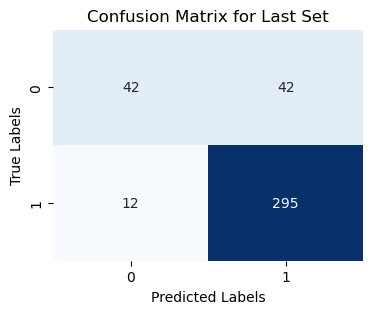

In [361]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Assuming you have the SVM model 'svm' trained on the last set
y_pred_last_set = svm.predict(X_test_sets[-1])  # Predictions on the test data

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_sets[-1], y_pred_last_set)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Last Set')
plt.show()


If we are to sort different validation scores:

AUPRC > F1 Score > Accuracy > percision > recall

which indicates the benefit of considering FalseNegative & FalsePositive estimations together(AUPRC&F1 score).

while missing any of them can end up in a inaccurate model fit(recall&peercision)

* Accuracy is not the best option for our data set model validation because:

    - It does not provide a comprehensive evaluation of the model’s performance, as accuracy does not take into account false positives and false negatives.

    - It is not suitable for our imbalanced datasets, where the class distribution is skewed.

    - It does not provide insights into the reasons behind the model’s performance, such as where the model is making mistakes or areas that need improvement.

    - It may lead to the selection of a suboptimal model, as it may prioritize accuracy over other important metrics such as precision, recall, or F1 score.

* AUPRC is the best option for our data set model validation because:
    - AUPRC provides a more informative measure of model performance in the case of imbalanced datasets, as it focuses on the trade-off between precision and recall.

    - It can help evaluate the model’s ability to correctly identify positive instances while minimizing false positives.

   - AUPRC is particularly useful when the positive class is rare or when the cost of false positives is high.

**3.3 Model Testing**


Best set out of 5: 2nd set(AUPRC=0.944)

In [368]:
X_train = data.drop('Res',axis=1) 
y_train = data['Res']
#training model
svm = SVC(C=10, kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=10)

In [365]:
# Read CSV file
data1 = pd.read_csv("test_data_1.csv")
# Define the mapping of string values to numerical values
education_mapping = {
    'Dip': 1,
    'Ad. Dip': 2,
    'Bach': 3,
    'Mst': 4,
    'Doct': 5,
    'P. Doct': 6
}
housing_mapping = {
    'R': 0.5,
    'N': 0,
    'O': 1
}
Sex_mapping = {
    'M':1,
    'F':0
}
data1['LoE'] = data1['LoE'].map(education_mapping)
data1['Housing'] = data1['Housing'].map(housing_mapping)
data1['MF'] = data1['MF'].map(Sex_mapping)

le = LabelEncoder()
data1['Car'] = le.fit_transform(data1['Car'])
# Normalize the data using min-max scaling
scaler = MinMaxScaler()
data1_scaled = scaler.fit_transform(data1)
data1 = pd.DataFrame(data1_scaled, columns=data1.columns)

In [366]:
# List of output labels for each model
y_pred = svm.predict(data1)

# Open a text file in write mode
with open('output_labels.txt', 'w') as file:
    # Iterate through the output labels and write them to the text file
    for label in y_pred:
        file.write(str(label) + '\n')

# Close the text file
file.close()

# 4.Model Simplification

**4.1 Feature selection**

In [390]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Extract the correlation values of all features with the output
corr_output = corr_matrix['Res']

# Calculate the absolute correlation values
corr_abs = corr_output.abs()

# Sort the absolute correlation values in ascending order
sorted_corr = corr_abs.sort_values()

# Display the features with the lowest correlation values
least_correlated_features = sorted_corr.index[:8]  # Adjust the number of features as needed

print("Features with the lowest correlation values with the output:")
print(least_correlated_features)

Features with the lowest correlation values with the output:
Index(['YoCW', 'Id', 'YoW', 'MF', 'Housing', 'Car', 'Age', 'Income'], dtype='object')


In [389]:
data2 = data.drop(['YoCW', 'Id', 'YoW', 'MF', 'Housing', 'Car', 'Age', 'Income'],axis=1)
X = data2.drop('Res',axis=1)
y = data2['Res']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
svm = SVC(C=10,kernel='rbf')
svm.fit(X_train,y_train)  
y_pred = svm.predict(X_test)
# Calculate evaluation metrics for the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auprc = auc(recall, precision)
print('AUPRC after feature selection:',auprc)

AUPRC after feature selection: 0.9302868483220923


* According to trial above,we can eleminate all but one of the features

**4.2 Feature reduction**

In [402]:
from sklearn.decomposition import PCA
X = data.drop('Res',axis=1)
# Assuming your data is stored in a variable 'X' (n samples x m features)
nf = 8  # Number of features to retain (9 - 1 = 8)
pca = PCA(n_components=nf)
X_new = pca.fit_transform(X)
import pandas as pd

# Assuming your original feature names are stored in a list 'feature_names'
X_df = pd.DataFrame(X_new, columns=X.columns[:nf])


* We can eleminate at most 5 features without violating criterion